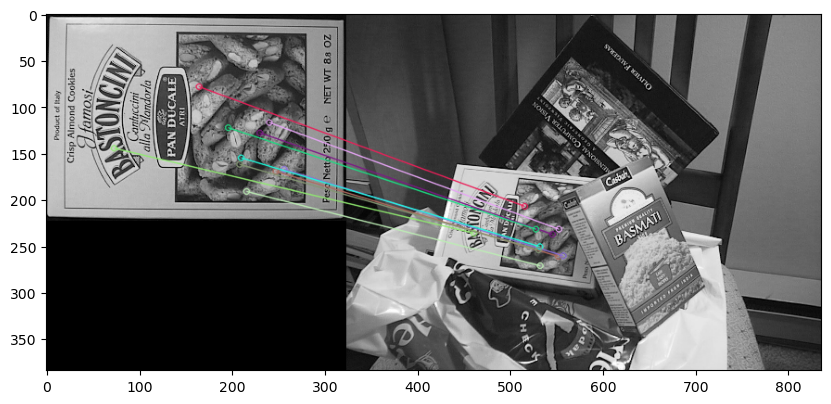

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt

qureyImg = cv.imread('box.png', cv.IMREAD_GRAYSCALE)
trainImg = cv.imread('box_in_scene.png', cv.IMREAD_GRAYSCALE)

sift = cv.SIFT_create()

query_keypoints, query_desc = sift.detectAndCompute(qureyImg, None)
train_keypoints, train_desc = sift.detectAndCompute(trainImg, None)

bf = cv.BFMatcher()

matches = bf.knnMatch(query_desc, train_desc, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append(m)

good = sorted(good, key = lambda x:x.distance)

res = cv.drawMatches(qureyImg, query_keypoints, trainImg, train_keypoints, \
                    good[:10], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(10,10))
plt.imshow(res)
